# Importing Libraries

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from joblib import dump



# Loading And Analyzing data


In [169]:
df = pd.read_csv('HeartFailureData.csv')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Displaying + Checking the following: Information, Describe, Shape, Value Counts(Main Column), Null Values, Nan Values

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [171]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [172]:
df.shape

(299, 13)

In [173]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [174]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [175]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Displaying The Coorealtion Matrix

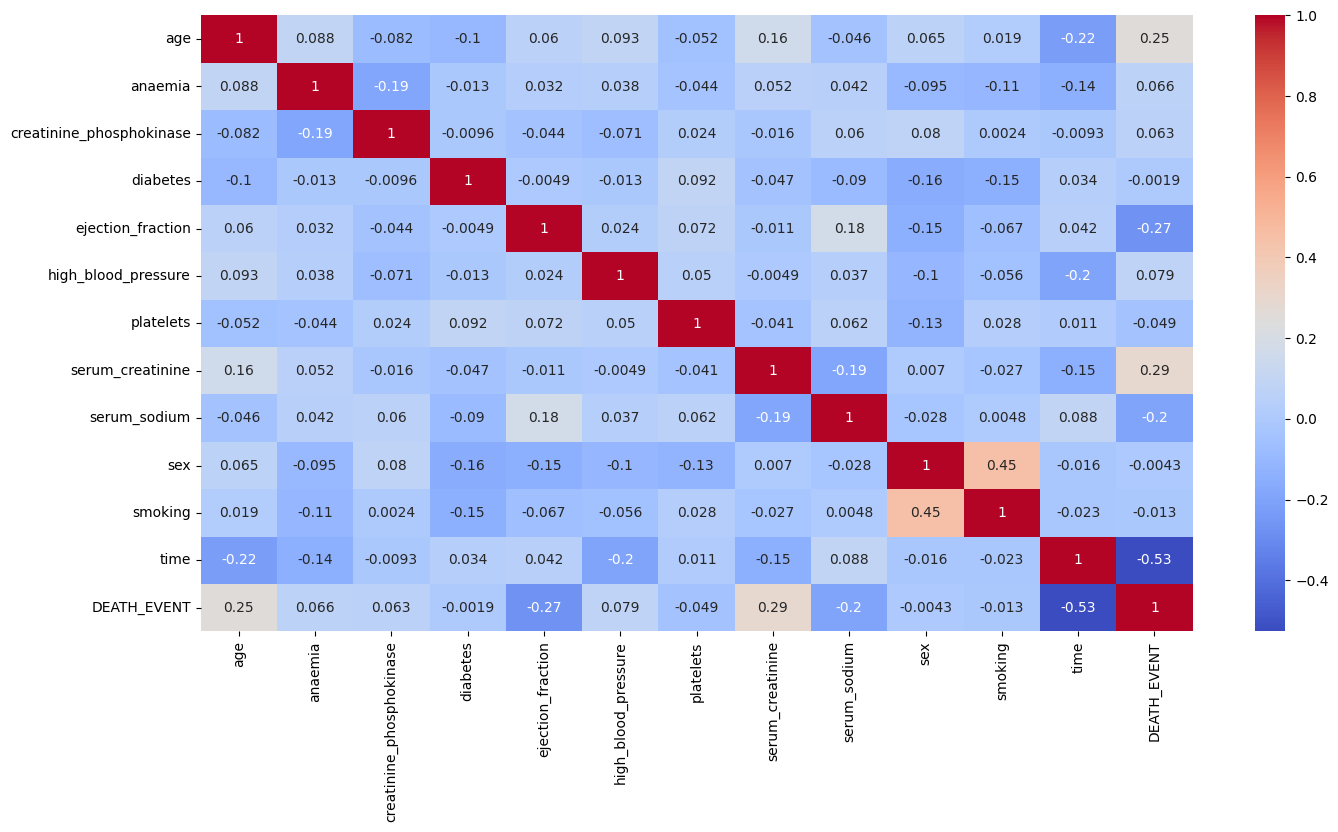

In [176]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()

## Plotting the data with respect to Death Event

<Figure size 1500x1200 with 0 Axes>

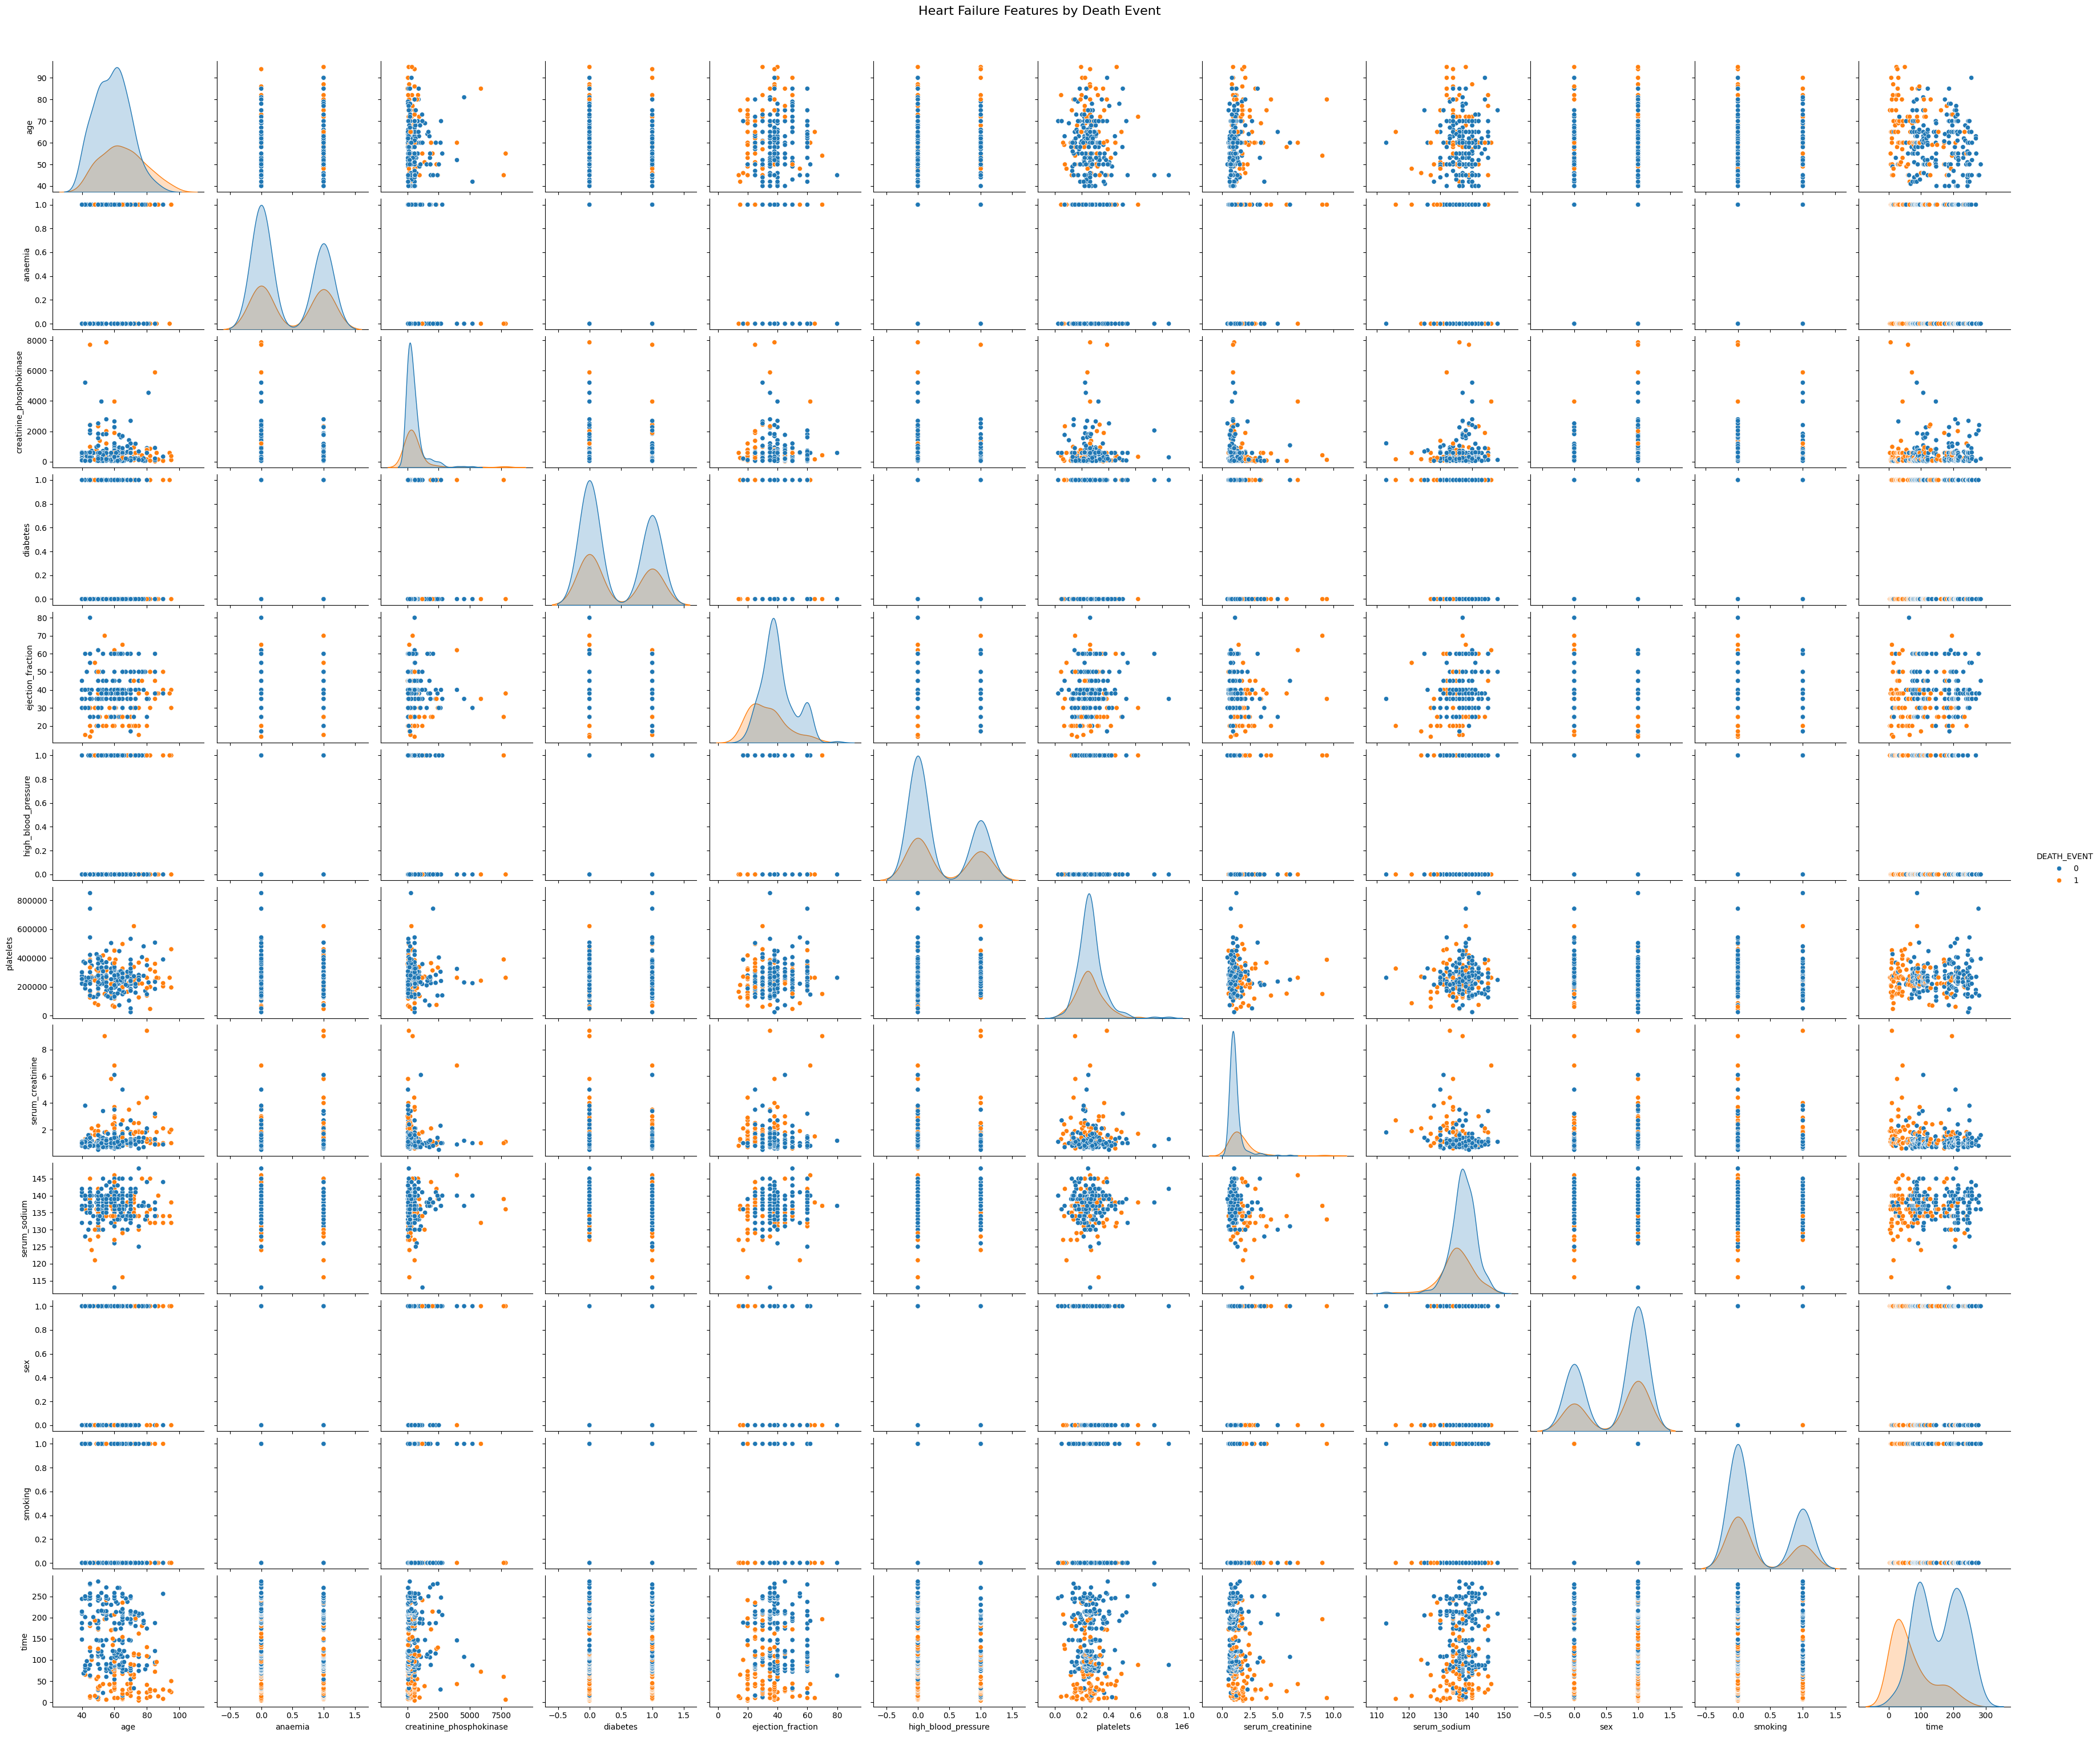

In [185]:
plt.figure(figsize=(15, 12))  # Add this before pairplot
sns.pairplot(df, hue='DEATH_EVENT', height=2.5, aspect=1.2)
plt.suptitle('Heart Failure Features by Death Event', y=1.02, fontsize=16)
plt.show()

# Data Preprocessing

## Seperating the target and train columns

In [178]:
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

## Splitting the data for model training and testing

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Defining the models in a list

In [180]:
RFC = RandomForestClassifier(random_state=0)
LR = LogisticRegression(random_state=0)
KNN = KNeighborsClassifier(n_neighbors=5)
SVM = SVC(random_state=0)
DT = DecisionTreeClassifier(random_state=0)

models = [RFC, LR, KNN, SVM, DT]

# Training the model and displaying the result

In [181]:
model_result = {}
trained_models = {}

for model in models: 
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    trained_models[model.__class__.__name__] = model
    
    
    
    model_result[model.__class__.__name__] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    results = model_result[model.__class__.__name__]
    print(f"{model.__class__.__name__} - Accuracy: {results['accuracy']:.4f}, Precision: {results['precision']:.4f}, Recall: {results['recall']:.4f}, F1: {results['f1']:.4f}\n")

RandomForestClassifier - Accuracy: 0.8167, Precision: 0.7000, Recall: 0.7368, F1: 0.7179

LogisticRegression - Accuracy: 0.8667, Precision: 0.8667, Recall: 0.6842, F1: 0.7647

KNeighborsClassifier - Accuracy: 0.7500, Precision: 0.7000, Recall: 0.3684, F1: 0.4828

SVC - Accuracy: 0.8333, Precision: 0.8462, Recall: 0.5789, F1: 0.6875

DecisionTreeClassifier - Accuracy: 0.8167, Precision: 0.6818, Recall: 0.7895, F1: 0.7317



## Dispalying the CV_Score

In [182]:

for model in models:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{model.__class__.__name__}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

RandomForestClassifier: 0.8160 (+/- 0.0923)
LogisticRegression: 0.7950 (+/- 0.0476)
KNeighborsClassifier: 0.6863 (+/- 0.0903)
SVC: 0.7699 (+/- 0.0266)
DecisionTreeClassifier: 0.7574 (+/- 0.0721)


## Overall Model comparision

In [183]:
results_df = pd.DataFrame(model_result).T
print("\n=== Model Comparison ===")
print(results_df.round(4))

# Find best model
best_model = results_df['recall'].idxmax()  # Focus on recall for medical data
print(f"\nBest model based on recall: {best_model}")


=== Model Comparison ===
                        accuracy  precision  recall      f1
RandomForestClassifier    0.8167     0.7000  0.7368  0.7179
LogisticRegression        0.8667     0.8667  0.6842  0.7647
KNeighborsClassifier      0.7500     0.7000  0.3684  0.4828
SVC                       0.8333     0.8462  0.5789  0.6875
DecisionTreeClassifier    0.8167     0.6818  0.7895  0.7317

Best model based on recall: DecisionTreeClassifier


# Saving the best model for future use

In [184]:
best_model_name = results_df['recall'].idxmax()
best_trained_model = trained_models[best_model_name]
model_package = {
    'model': best_trained_model,
    'scaler': scaler,
    'feature_names': X.columns.tolist(),
    'model_name': best_model_name
}

filename = 'heartFailure_model.pkl'
dump(model_package, filename)
print(f"Model saved as {filename}")

Model saved as heartFailure_model.pkl
